In [26]:
#Importações
import pandas as pd
import seaborn as srn
import statistics as sts

In [27]:
#Importando tabela
df = pd.read_csv('tempo.csv', sep=';')

In [28]:
#Visualizando tabela
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [29]:
#Tamanho
df.shape

(14, 5)

In [30]:
#Explorando dados
#Coluna - Aparencia 
agrup = df.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot: xlabel='Aparencia'>

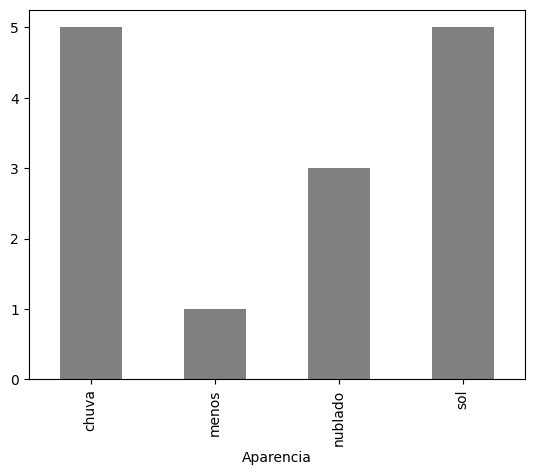

In [31]:
agrup.plot.bar(color='gray')

In [32]:
#Explorando dados
#Coluna - Vento 
agrup = df.groupby(['Vento']).size()
agrup

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot: xlabel='Vento'>

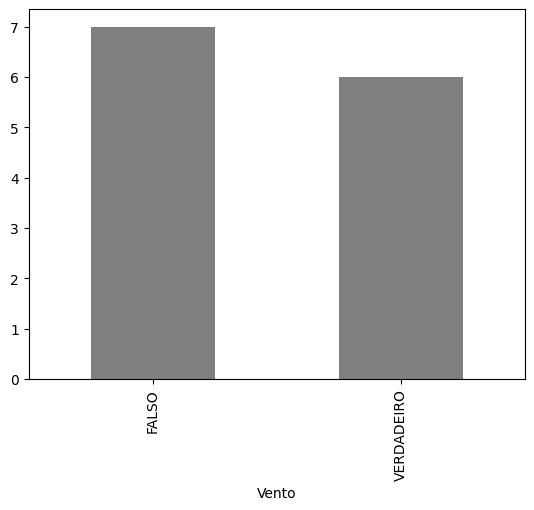

In [33]:
agrup.plot.bar(color='gray')

In [34]:
#Explorando dados
#Coluna - Jogar 
agrup = df.groupby(['Jogar']).size()
agrup

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot: xlabel='Jogar'>

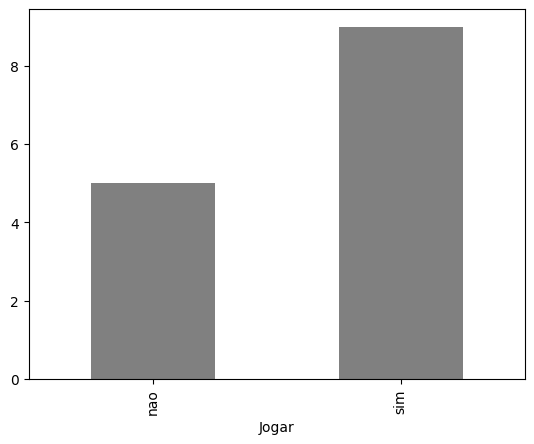

In [35]:
agrup.plot.bar(color='gray')

In [36]:
#Coluna - Temparatura
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temp')

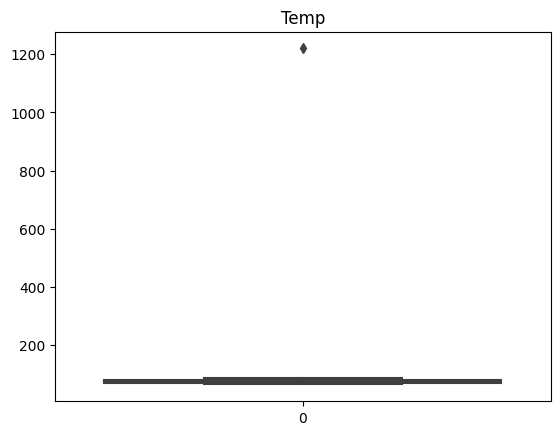

In [37]:
srn.boxplot(df['Temperatura']).set_title('Temp')

/var/folders/5d/zxdz5v6n6l5g_gp4cdn8dcy00000gn/T/ipykernel_72841/2061364242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Temperatura']).set_title('Temp')


Text(0.5, 1.0, 'Temp')

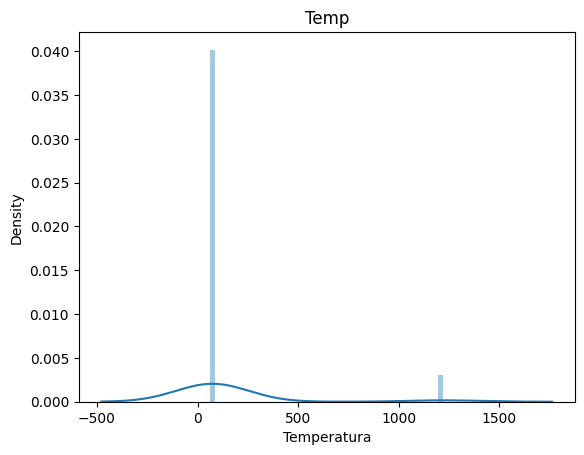

In [38]:
srn.distplot(df['Temperatura']).set_title('Temp')

In [39]:
#Coluna - Temparatura
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

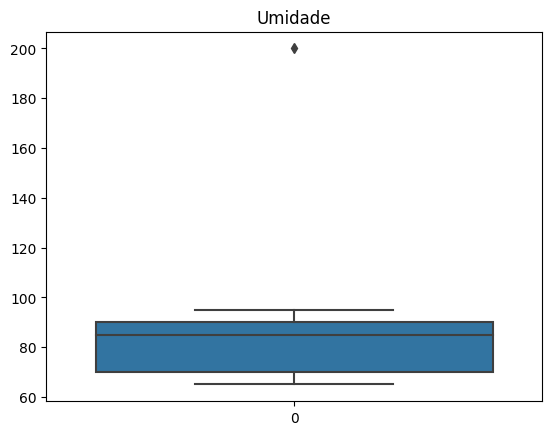

In [40]:
srn.boxplot(df['Umidade']).set_title('Umidade')

/var/folders/5d/zxdz5v6n6l5g_gp4cdn8dcy00000gn/T/ipykernel_72841/1995842541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

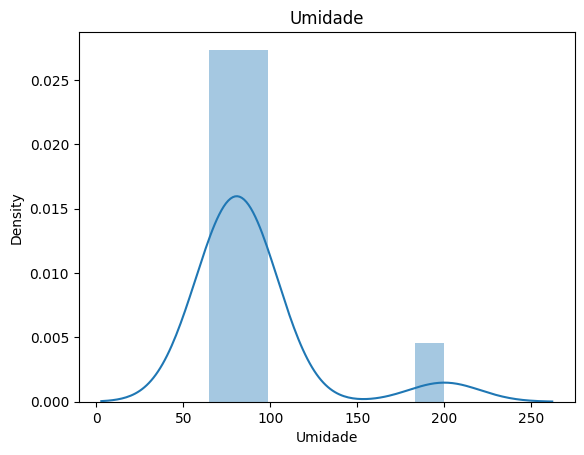

In [41]:
srn.distplot(df['Umidade']).set_title('Umidade')


In [42]:
#Contagem de valores NaN
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [43]:
#Coluna - Aparencia
agrup = df.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [44]:
df['Aparencia'].isnull().sum()

0

In [45]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrup = df.groupby(['Aparencia']).size()
agrup

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [46]:
#Coluna - Temperatura
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [47]:
#Conferindo valores no dominio
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [52]:
#Calculando mediana
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [53]:
#Substituindo 
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130), 'Temperatura'] = mediana

In [54]:
#Conferindo
df.loc[(df['Temperatura'] < -130) | (df['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [55]:
#Coluna - Umidade
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [57]:
df['Umidade'].isnull().sum()

1

In [58]:
#Calculando Mediana
mediana = sts.median(df['Umidade'])
mediana

85.5

In [59]:
#Substituindo NaN por mediana
df['Umidade'].fillna(mediana, inplace=True)

In [70]:
#Conferindo
df['Umidade'].isnull().sum()

0

In [61]:
#Conferindo dominio
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100)]


,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [62]:
#Substituindo falores pela mediana
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100), 'Umidade'] = mediana


In [63]:
#Conferindo
df.loc[(df['Umidade'] < 0) | (df['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [64]:
#Coluna - Vento
agrup = df.groupby(['Vento']).size()
agrup

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [65]:
df['Vento'].isnull().sum()

1

In [68]:
#Substituindo valor NaN pela moda
df['Vento'].fillna('FALSO', inplace=True)

In [69]:
df['Vento'].isnull().sum()

0

In [71]:
agrup = df.groupby(['Vento']).size()
agrup

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [72]:
#Coluna - Jogar
agrup = df.groupby(['Jogar']).size()
agrup

Jogar
nao    5
sim    9
dtype: int64

In [73]:
df['Jogar'].isnull().sum()

0